# Pass Networks
Pass Networks for FC Barcelona against Valladolid in La Liga

In [1]:
import pandas as pd
from mplsoccer.pitch import Pitch

In [2]:
df = pd.read_csv('passnetworks.csv')
df.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8


In [3]:
barca = df[df['teamId']=='Barcelona']
barca.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8


In [4]:
barca['passer'] = barca['playerId']
barca['recipient'] = barca['playerId'].shift(-1)  # Shifts value down by one row

passes = barca[barca['type'] == 'Pass']
successful = passes[passes['outcome'] == 'Successful']
successful.head()

<ipython-input-4-9f26c81977c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca['passer'] = barca['playerId']
<ipython-input-4-9f26c81977c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca['recipient'] = barca['playerId'].shift(-1)  # Shifts value down by one row


,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0


In [5]:
subs = barca[barca['type'] == 'SubstitutionOff']
subs = subs['minute']
firstSub = subs.min()
firstSub

70

In [6]:
preSub = successful[successful['minute'] < firstSub]

In [7]:
pas = pd.to_numeric(preSub['passer'], downcast='integer')
rec = pd.to_numeric(preSub['recipient'], downcast='integer')
preSub['passer'] = pas
preSub['recipient'] = rec
preSub.head()

<ipython-input-7-799ec68a423c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preSub['passer'] = pas
<ipython-input-7-799ec68a423c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preSub['recipient'] = rec


,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9,8
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8,21
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21,15
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15,1
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1,15


In [8]:
average_location = preSub.groupby('passer').agg({'x':['mean'], 'y':['mean', 'count']})  # gives average location of x and y for each passer and the number of recipients
average_location.columns = ['x', 'y', 'count']  # Count is the number of successful passes
average_location.head()

,x,y,count
passer,,,
1,7.124000,50.324000,25
2,68.274359,11.915385,39
4,32.895833,43.518750,48
8,53.332927,41.608537,82
9,69.916667,51.383333,6


In [9]:
# number of successful passes bettween two players
pass_between = successful.groupby(['passer', 'recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'}, axis = 'columns', inplace = True)
pass_between.head()

,passer,recipient,pass_count
0,1.0,2.0,3
1,1.0,4.0,3
2,1.0,8.0,5
3,1.0,9.0,1
4,1.0,15.0,6


In [10]:
# Merging average location with pass_between
pass_between = pass_between.merge(average_location, left_on = 'passer', right_index = True)  # Left join on Passer
pass_between = pass_between.merge(average_location, left_on = 'recipient', right_index = True, suffixes = ['','_end'])
pass_between.head()

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,1.0,2.0,3,7.124000,50.324000,25,68.274359,11.915385,39
21,4.0,2.0,1,32.895833,43.518750,48,68.274359,11.915385,39
29,8.0,2.0,8,53.332927,41.608537,82,68.274359,11.915385,39
41,9.0,2.0,2,69.916667,51.383333,6,68.274359,11.915385,39
46,10.0,2.0,6,63.201613,42.351613,62,68.274359,11.915385,39


In [11]:
pass_between = pass_between[pass_between['pass_count']>3]

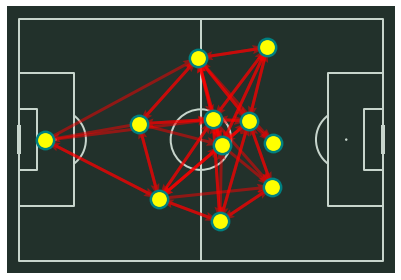

In [12]:
# Creating the Pitch
pitch = Pitch(pitch_type = 'statsbomb', orientation = 'horizontal',
              pitch_color = '#22312b', line_color='#c7d5cc', figsize=(16,11),
              constrained_layout=False, tight_layout=True)
fig,ax = pitch.draw()
# plotting points
arrows = pitch.arrows(1.2*pass_between.x, 0.8*pass_between.y, 
                      1.2*pass_between.x_end, 0.8*pass_between.y_end, 
                      ax = ax, width = 3, headwidth = 3, color = 'red',
                      zorder = 1, alpha = 0.5) # Fitting data to scale of the pitch
# adding nodes
nodes = pitch.scatter(1.2*average_location.x, 0.8*average_location.y,
                     s = 300, color = 'yellow', edgecolors = 'teal',
                     linewidth = 2.5, alpha = 1, zorder = 1, ax = ax)